# Dummy Dataset

In [8]:
import numpy as np
from sklearn.datasets import make_classification

# Create dummy data
# The output of make_classification consists of feature data X and labels y
# The labels y will be encoded (numerical) data
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# By default, make_classification produces float values
# We need to convert them to discrete form

# Take the absolute value of the values
X = np.absolute(X)

# Round values to two decimal places
# Multiply by 100 so that there are no decimal points
X = np.round(X, 2) * 100

# Convert to integer type
X = X.astype(int)

# Check the result
print(X)
print(y)

[[  2  76]
 [105 113]
 [ 98  68]
 [ 57 132]
 [ 49  99]
 [ 53  78]
 [112 106]
 [155 102]
 [ 86 118]
 [137  69]
 [ 91 103]
 [ 67  38]
 [104 133]
 [128 174]
 [ 59 138]
 [128  69]
 [154  18]
 [ 98 127]
 [ 39 137]
 [200  84]
 [ 55  90]
 [118   9]
 [ 63 101]
 [ 35  16]
 [ 33  40]
 [215 210]
 [171 158]
 [268 250]
 [209 197]
 [223 213]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


# Data Frame

In [9]:
import pandas as pd

# Reshape label y into 2D
# This is done because we will concatenate it with the feature data X
y_new = y.reshape(len(y), 1)

# Concatenate features X and label y into an array
data = np.concatenate((X, y_new), axis=1)

# Define column names
nama_kolom = ['Feature 1', 'Feature 2', 'Label']

# Create DataFrame
df = pd.DataFrame(data, columns=nama_kolom)

# Inspect the DataFrame
df.head()

,Feature 1,Feature 2,Label
0,2,76,0
1,105,113,0
2,98,68,0
3,57,132,0
4,49,99,0


# Labeling

In [10]:
# Define label names
labels = {
    1 : 'Class A',
    0 : 'Class B'
}

# Copy the DataFrame to create a new DataFrame
# with more readable labels
df_label = df.copy()

# Replace labels using the Pandas mapping function
# on the df_label DataFrame
df_label['Label'] = df_label['Label'].map(labels)

# Inspect the df_label DataFrame
df_label.head()

,Feature 1,Feature 2,Label
0,2,76,Class B
1,105,113,Class B
2,98,68,Class B
3,57,132,Class B
4,49,99,Class B


# Visualisasi data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35396\2596175609.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Class A')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35396\2596175609.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Class B')


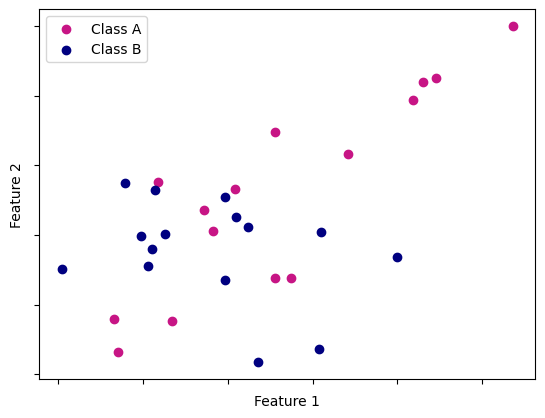

In [11]:
import matplotlib.pyplot as plt

# Define colors for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Group labels by class name
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Class A')
class_b = gb.get_group('Class B')

# Plot
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], c=colors['class_a'])
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], c=colors['class_b'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class A', 'Class B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

# Model Multinominal Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB # class for the MultinomialNB model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluate the model using accuracy

# Instantiate a MultinomialNB object
mnb = MultinomialNB()

# We can directly use the feature matrix X and labels y
# resulting from the dummy data generation process

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit the model
# The label y must be in 1D form or (n_samples,)
mnb.fit(X_train, y_train)

# Predict on training data
y_train_pred = mnb.predict(X_train)

# Evaluate training accuracy
acc_train = accuracy_score(y_train, y_train_pred)

# Predict test data
y_test_pred = mnb.predict(X_test)

# Evaluate the model using the accuracy metric
acc_test = accuracy_score(y_test, y_test_pred)

# Print evaluation results
print(f'Training accuracy: {acc_train}')
print(f'Test accuracy: {acc_test}')

Training accuracy: 0.42857142857142855
Test accuracy: 0.3333333333333333


# Model Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB # class for the GaussianNB model

# Instantiate a Gaussian object
gnb = GaussianNB()

# We use the same training and testing split
# as used for the multinomial model

# Fit the model
# The label y must be in 1D form or (n_samples,)
gnb.fit(X_train, y_train)

# Predict on training data
y_train_pred_gnb = gnb.predict(X_train)

# Evaluate training accuracy
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Predict test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluate the model using the accuracy metric
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print evaluation results
print(f'Training accuracy (Gaussian): {acc_train_gnb}')
print(f'Test accuracy (Gaussian): {acc_test_gnb}')

Training accuracy (Gaussian): 0.7142857142857143
Test accuracy (Gaussian): 0.5555555555555556
